TITANIC

Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As observed , we have a mixture of Numerical and categorical dataset

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177, 687 and  2 data's missing in Age,Cabin and Embarked respectively.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The gap between the 75% percentile and the max value is less, indicating that less outliers might present

<AxesSubplot:xlabel='Age', ylabel='Density'>

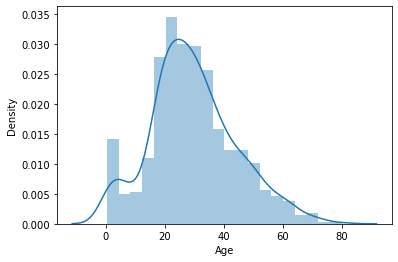

In [8]:
sns.distplot(df['Age'])

It is observed that the distribution is almost close to the normal distribution,hence, would proceed with the Mean method to replace the missing values in this category.

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
df['Age'].isnull().sum()

0

Thus, we can see that the mean values have been filled and there are no null values in the Age feature

In [11]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
D7             1
D9             1
B50            1
E68            1
C85            1
Name: Cabin, Length: 147, dtype: int64

As we see that the cabin ranges from A to G, hence will treat the missing value as H.

In [12]:
df['Cabin']=df['Cabin'].fillna('H')

In [13]:
df['Cabin']=df['Cabin'].astype('str').str[:1]

In [14]:
df['Cabin'].head()

0    H
1    C
2    H
3    C
4    H
Name: Cabin, dtype: object

In [15]:
df['Cabin'].value_counts()

H    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Thus, now on checking the 0 values of fare

In [16]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,H,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,H,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,H,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,H,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,H,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,H,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,H,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,H,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,H,S


As we can see most of the 0 values are from the cabin H,B and A ,Also from the embarkment S

In [17]:
df[(df['Cabin']=='H')& (df['Embarked']=='S')].mean()

PassengerId    446.485437
Survived         0.266019
Pclass           2.625243
Age             28.316820
SibSp            0.603883
Parch            0.396117
Fare            18.003064
dtype: float64

Thus the mean fare comes out to be 18 for the Embark H, so we will be replace the 0 values with 18

In [18]:
df.loc[(df['Cabin']=='H')& (df['Embarked']=='S'),'Fare']=18.003

Now proceeding with the Cabin A and B

In [19]:
df[(df['Cabin']=='A')&(df['Embarked']=='S')].mean()

PassengerId    465.375000
Survived         0.375000
Pclass           1.000000
Age             33.887169
SibSp            0.000000
Parch            0.250000
Fare            40.731763
dtype: float64

In [20]:
df.loc[(df['Cabin']=='A')&(df['Embarked']=='S'),'Fare']=40.7

In [21]:
df[(df['Cabin']=='B')& (df['Embarked']=='S')].mean()

PassengerId    627.869565
Survived         0.695652
Pclass           1.000000
Age             32.943440
SibSp            0.391304
Parch            0.608696
Fare            85.372283
dtype: float64

In [22]:
df.loc[(df['Cabin']=='B')&(df['Embarked']=='S'),'Fare']=85.37

In [23]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


As we can see there are no 0 values for the Fare feature

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.203827
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,46.657955
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,18.003000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,18.003000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,20.468750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Going to drop PassengerID,Name,Ticket,SibSp,Parch as they dont seem to add any relativity to the survey

In [25]:
df_new=df.drop(['PassengerId','Name','Ticket','SibSp','Parch'],axis=1)
df_new

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.000000,18.0030,H,S
1,1,1,female,38.000000,71.2833,C,C
2,1,3,female,26.000000,18.0030,H,S
3,1,1,female,35.000000,53.1000,C,S
4,0,3,male,35.000000,18.0030,H,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,18.0030,H,S
887,1,1,female,19.000000,85.3700,B,S
888,0,3,female,29.699118,18.0030,H,S
889,1,1,male,26.000000,30.0000,C,C


Need to look at the survival status

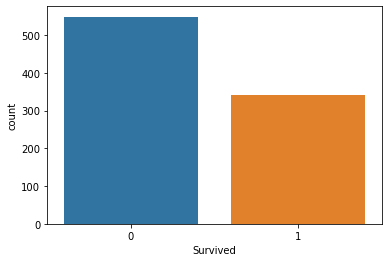

In [26]:
sns.countplot(df_new.Survived)
plt.show()

Not many passengers survived the sink

<AxesSubplot:xlabel='Survived', ylabel='count'>

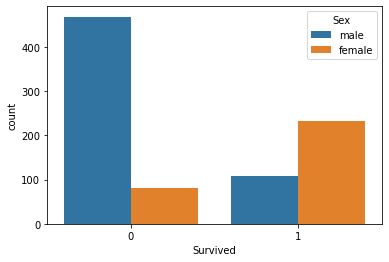

In [27]:
sns.countplot(x='Survived',hue='Sex',data=df_new)

MOst of the females have survived

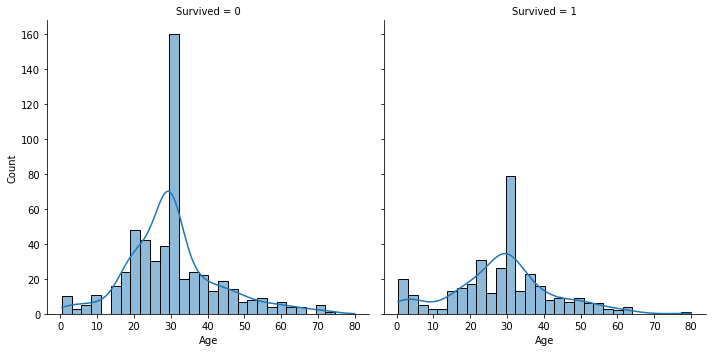

In [28]:
sns.displot(data=df_new,x='Age',col='Survived',kde=True)

As observed the survival rate is less as most of the deaths and escapes have been betwen the age of 20's and 30's,also, we could conclude that the people who boarded the ship where mostly at thirties.

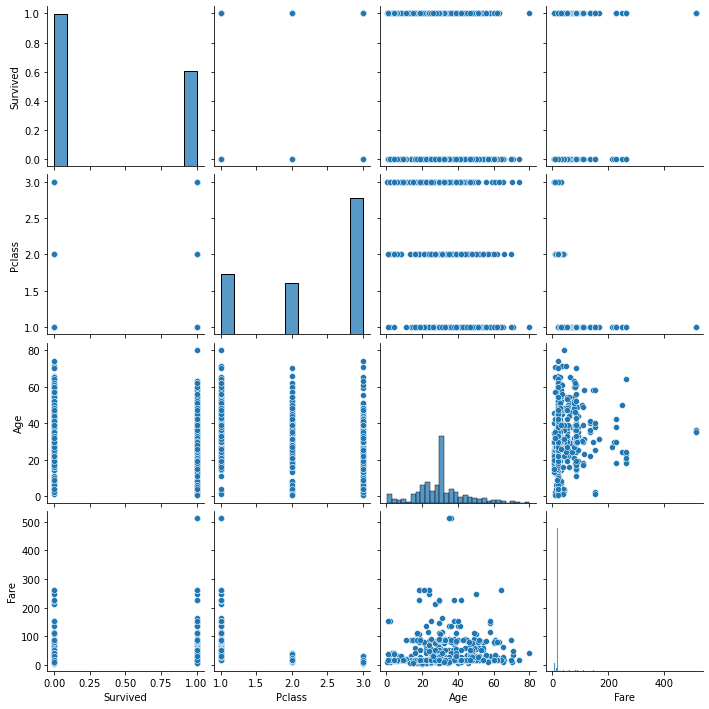

In [29]:
sns.pairplot(df_new)

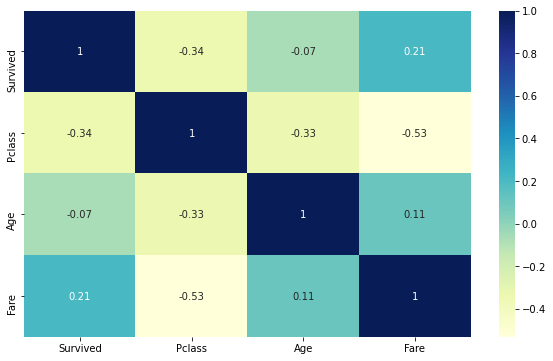

In [30]:
cor=df_new.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=cor,annot=True,cmap="YlGnBu")
plt.show()

We could see that people who paid higher fares were able to survive

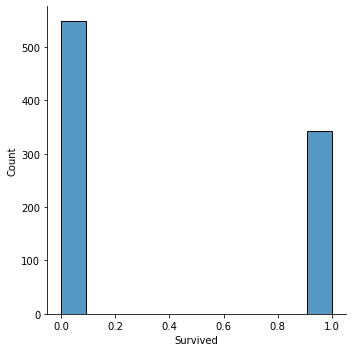

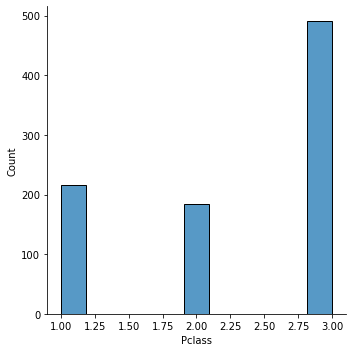

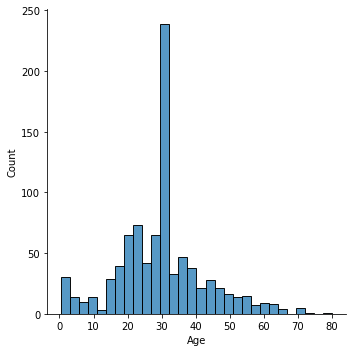

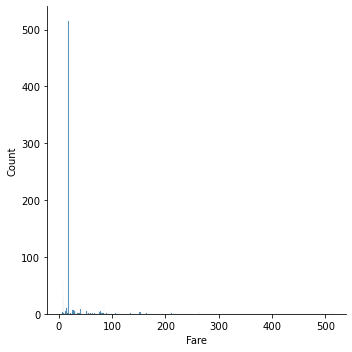

In [31]:
column=['Survived','Pclass','Age','Fare']
for i in df_new[column]:
    sns.displot(df_new[i])
    plt.show()
        

In [32]:
df_new.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
Fare        5.542353
dtype: float64

The skewness is present, need to remove the skewness, we will be applying Power transformer method, butsince some features are in categorical form, we will convert those into numerical form.

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
Trans=['Sex','Cabin','Embarked']
for i in Trans:
    df_new[i]=le.fit_transform(df_new[i]) 

Now proceeding with the removal of skewness using power transformer method for 

In [37]:
df_new.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,1,22.0,18.0030,7,2
1,1,1,0,38.0,71.2833,2,0
2,1,3,0,26.0,18.0030,7,2
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,18.0030,7,2


In [38]:
from sklearn.preprocessing import power_transform

In [39]:
dfdrop=df_new.drop(['Survived','Sex','Cabin','Embarked','Age'],axis=1)

In [40]:
df1=power_transform(dfdrop)

In [41]:
df2=pd.DataFrame(data=df1,columns=dfdrop.columns)

In [42]:
df2.head()

,Pclass,Fare
0,0.863973,-0.131763
1,-1.459129,1.559453
2,0.863973,-0.131763
3,-1.459129,1.297624
4,0.863973,-0.131763


In [43]:
df2.skew()

Pclass   -0.441438
Fare     -0.033772
dtype: float64

Thus , the skewness is removed, now adding this to the dataset

In [44]:
dff=pd.DataFrame()

In [45]:
dff['Survived']=df_new['Survived']
dff['Sex']=df_new['Sex']
dff['Cabin']=df_new['Cabin']
dff['Embarked']=df_new['Embarked']
dff['Age']=df_new['Age']
dff['Pclass']=df2['Pclass']
dff['Fare']=df2['Fare']

In [46]:
dff.head()

,Survived,Sex,Cabin,Embarked,Age,Pclass,Fare
0,0,1,7,2,22.0,0.863973,-0.131763
1,1,0,2,0,38.0,-1.459129,1.559453
2,1,0,7,2,26.0,0.863973,-0.131763
3,1,0,2,2,35.0,-1.459129,1.297624
4,0,1,7,2,35.0,0.863973,-0.131763


Now checking for outliers

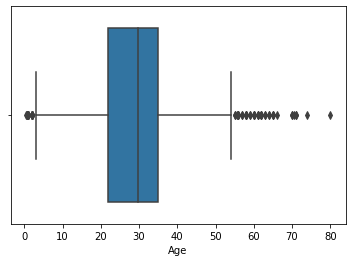

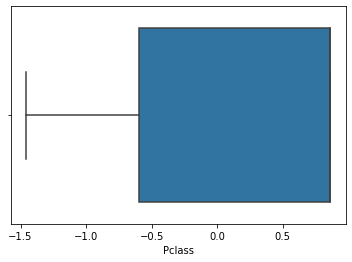

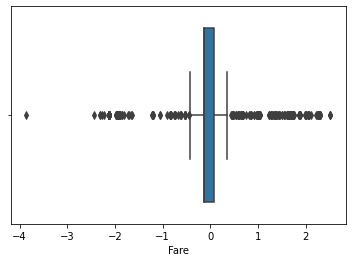

In [47]:
columns=['Age','Pclass','Fare']
for i in columns:
    sns.boxplot(dff[i])
    plt.show()

In [48]:
from scipy.stats import zscore

In [49]:
z=np.abs(zscore(dff))
z

array([[0.78927234, 0.73769513, 0.51129323, ..., 0.5924806 , 0.86397329,
        0.1317627 ],
       [1.2669898 , 1.35557354, 1.91449093, ..., 0.63878901, 1.45912855,
        1.55945341],
       [1.2669898 , 1.35557354, 0.51129323, ..., 0.2846632 , 0.86397329,
        0.1317627 ],
       ...,
       [0.78927234, 1.35557354, 0.51129323, ..., 0.        , 0.86397329,
        0.1317627 ],
       [1.2669898 , 0.73769513, 1.91449093, ..., 0.2846632 , 1.45912855,
        0.64774322],
       [0.78927234, 0.73769513, 0.51129323, ..., 0.17706291, 0.86397329,
        1.94286409]])

In [50]:
dff_new=dff[(z<3).all(axis=1)]

In [51]:
dff.shape

(891, 7)

In [52]:
dff_new.shape

(883, 7)

the outliers are removed, now splitting the data for the Model

In [53]:
x=dff_new.drop(columns='Survived')
y=dff_new['Survived']

In [54]:
x.head()

,Sex,Cabin,Embarked,Age,Pclass,Fare
0,1,7,2,22.0,0.863973,-0.131763
1,0,2,0,38.0,-1.459129,1.559453
2,0,7,2,26.0,0.863973,-0.131763
3,0,2,2,35.0,-1.459129,1.297624
4,1,7,2,35.0,0.863973,-0.131763


Now we need to standardize the data

In [55]:
y.shape

(883,)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()

In [58]:
sc_x=sc.fit_transform(x)

In [59]:
a=sc_x
a=pd.DataFrame(a,columns=x.columns)

In [60]:
a.head()

,Sex,Cabin,Embarked,Age,Pclass,Fare
0,0.742863,0.509500,0.578065,-0.590865,0.861152,-0.134527
1,-1.346143,-1.938206,-1.948823,0.691545,-1.466069,1.573132
2,-1.346143,0.509500,0.578065,-0.270262,0.861152,-0.134527
3,-1.346143,-1.938206,0.578065,0.451093,-1.466069,1.308757
4,0.742863,0.509500,0.578065,0.451093,0.861152,-0.134527


In [61]:
a.shape

(883, 6)

NOw we will proceed towards modelling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8490566037735849  on Random state 21


In [64]:
x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=.30,random_state=133)

In [65]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [66]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.7962264150943397
[[136  27]
 [ 27  75]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       163
           1       0.74      0.74      0.74       102

    accuracy                           0.80       265
   macro avg       0.78      0.78      0.78       265
weighted avg       0.80      0.80      0.80       265

Accuracy score of SVC(probability=True)
0.8150943396226416
[[153  10]
 [ 39  63]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       163
           1       0.86      0.62      0.72       102

    accuracy                           0.82       265
   macro avg       0.83      0.78      0.79       265
weighted avg       0.82      0.82      0.81       265

Accuracy score of KNeighborsClassifier()
0.8150943396226416
[[146  17]
 [ 32  70]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86  

We have got the score for all the above models. Decision Tree Classifier has given us the best accuracy

Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,a,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())

Mean Accuracy of LogisticRegression()
0.7848228043143297
Mean Accuracy of SVC(probability=True)
0.8142526964560863
Mean Accuracy of KNeighborsClassifier()
0.8041024653312789
Mean Accuracy of RandomForestClassifier()
0.8176746276322548
Mean Accuracy of DecisionTreeClassifier()
0.8142912172573189
Mean Accuracy of GaussianNB()
0.7735554699537751
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7950372367745249


AUC Score of LogisticRegression()
0.7848249729339589




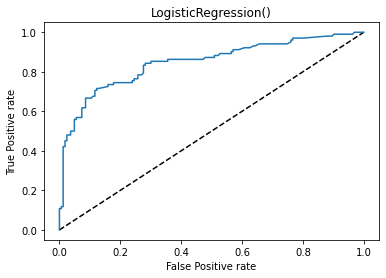

AUC Score of SVC(probability=True)
0.7781486827859979




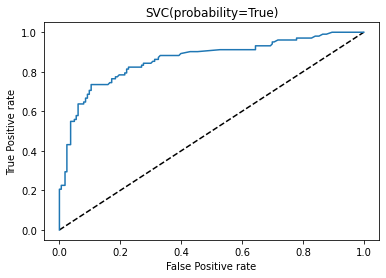

AUC Score of KNeighborsClassifier()
0.7909900156381571




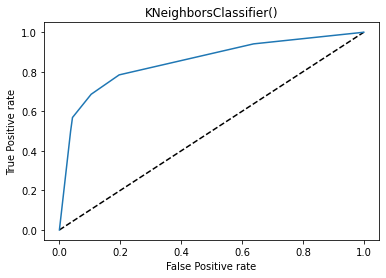

AUC Score of RandomForestClassifier()
0.8001623962468423




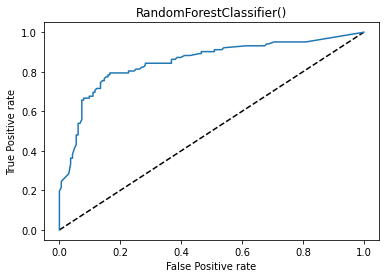

AUC Score of DecisionTreeClassifier()
0.7989293877060026




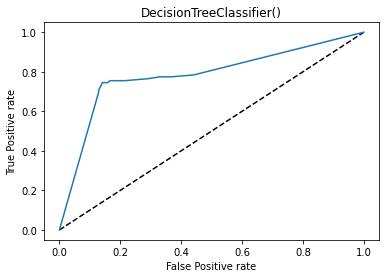

AUC Score of GaussianNB()
0.7645855888367619




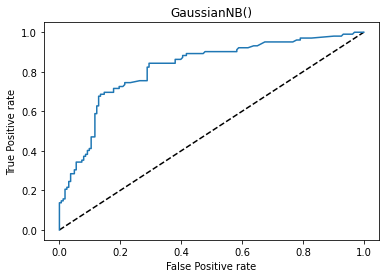

AUC Score of AdaBoostClassifier(n_estimators=100)
0.7927643450018043




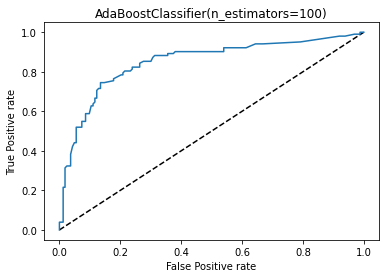

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()

We will now compare all our metrics score to determine the best fitting model

In [69]:
Performance={'Model':['LogisticRegression','SVC','KNN','RFC','DTC','GNB','ADC'],
            'Test_Accuracy':[84,82,81,81,78,78,82],
            'Cross_val_score':[79,80,81,81,77,74,80],
            'Diffeerence':[84-79,82-80,81-81,81-81,78-77,78-74,82-80],
            'ROC_AUC_score':[82,76,78,80,77,77,80]}

In [70]:
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test_Accuracy,Cross_val_score,Diffeerence,ROC_AUC_score
0,LogisticRegression,84,79,5,82
1,SVC,82,80,2,76
2,KNN,81,81,0,78
3,RFC,81,81,0,80
4,DTC,78,77,1,77
5,GNB,78,74,4,77
6,ADC,82,80,2,80


After checking the above metrics we can confirm that RandomForest Classifier has performed well with Test accuracy of 81%, Croass val score of 81% as well and ROC_AUC score of 80%.Thus,We will select RFC and move forward for hypertuning the model

HyperTuning

In [71]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Fitting our best model for HyperTuning

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 250, 500]})

In [74]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 250}

Fitting the model with the above parameters

In [75]:
Finalmod=RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators= 250)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.26415094339623


After Hypertuning,there has been a siginificant inrease in the model performance.Proceeding with the  saving of model

In [79]:
import joblib
joblib.dump(Finalmod,'titanic_model.obj')

['titanic_model.obj']